In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('../data/processed/preprocessed_data.csv')

print('Shape:', df.shape)
print('Memory Usage:', df.memory_usage().sum() / 1024**2, 'MB')
print('Missing Values:', df.isnull().sum().sum())

Shape: (3933955, 14)
Memory Usage: 420.1918487548828 MB
Missing Values: 0


In [3]:
df.head()

,ID,Sex,Age Group,Natural Sciences,Human Sciences,Language,Mathematics,Best Area,Worst Area,Family Income,Mother's Education,Father's Education,Number of Computers,Internet Access
0,210059085136,M,14,495.75,523.35,518.15,533.84,Mathematics,Natural Sciences,3960,0,5,0,1
1,210059527735,M,12,495.75,523.35,518.15,533.84,Mathematics,Natural Sciences,6600,5,4,3,1
2,210061103945,F,6,502.00,498.90,475.60,363.20,Natural Sciences,Mathematics,1980,7,4,0,1
3,210060214087,F,2,459.00,508.50,507.20,466.70,Human Sciences,Natural Sciences,1980,3,3,0,1
4,210059980948,F,3,402.50,379.20,446.90,338.30,Language,Mathematics,1320,1,1,0,0


## In which knowledge areas do candidates perform better/worse?

Average scores by area:
Natural Sciences   495.75
Human Sciences     523.35
Language           518.15
Mathematics        533.84
dtype: float64


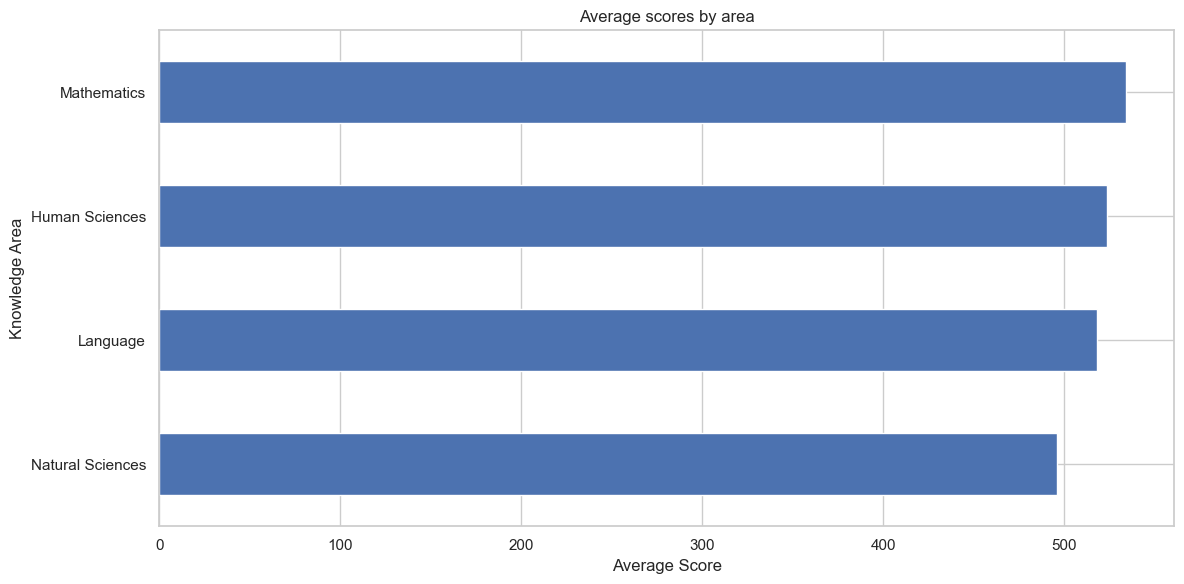

In [4]:
area_cols = ['Natural Sciences', 'Human Sciences', 'Language', 'Mathematics']
df['Average'] = df[area_cols].mean(axis=1)
area_means = df[area_cols].mean()

print('Average scores by area:')
print(area_means)

plt.figure()
area_means.sort_values().plot(kind='barh')
plt.title('Average scores by area')
plt.xlabel('Average Score')
plt.ylabel('Knowledge Area')
plt.tight_layout()
plt.show()

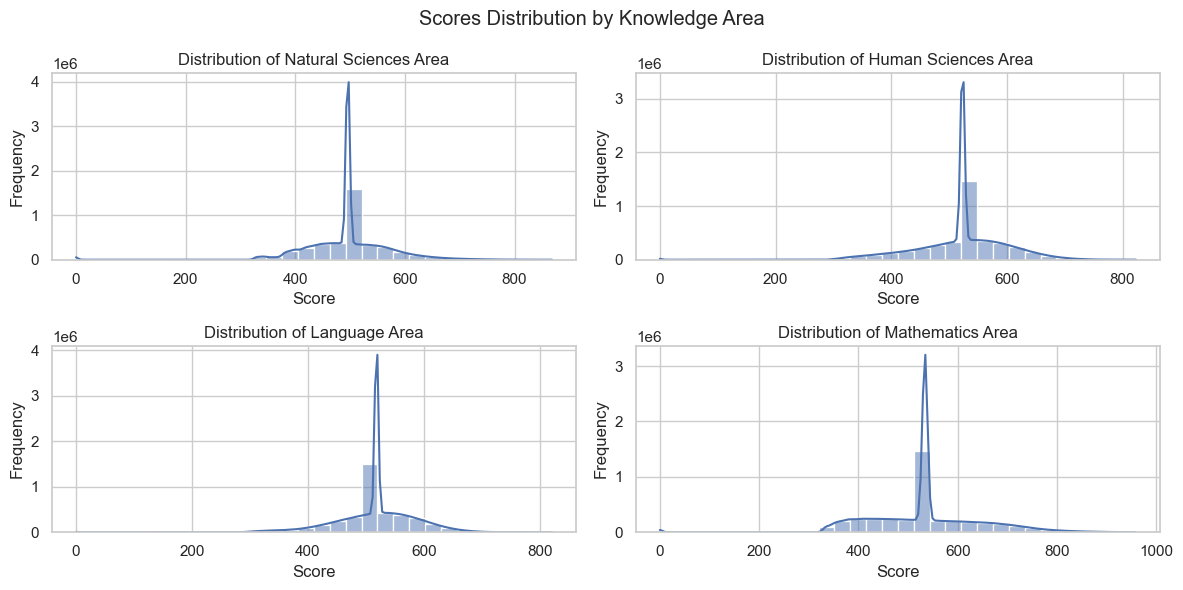

In [5]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(area_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col} Area')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
plt.suptitle('Scores Distribution by Knowledge Area')
plt.tight_layout()
plt.show()

## Is there a difference in performance between genders?

In [6]:
gender_stats = df.groupby(['Sex'])['Average'].describe()

gender_stats['cv'] = gender_stats['std'] / gender_stats['mean']

print('Gender Stats:')
print(gender_stats)

Gender Stats:
         count   mean   std  min    25%    50%    75%    max   cv
Sex                                                              
F   2411185.00 512.65 65.79 0.00 475.67 517.77 536.08 823.00 0.13
M   1522770.00 525.88 71.51 0.00 493.66 517.77 562.17 833.23 0.14


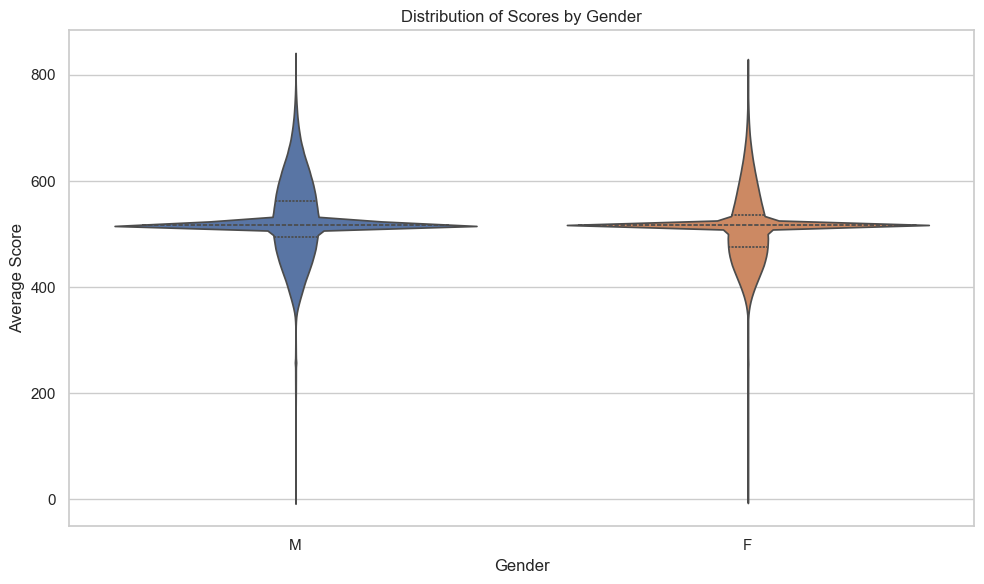

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Average', data=df, inner='quartile', hue='Sex')
plt.title('Distribution of Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

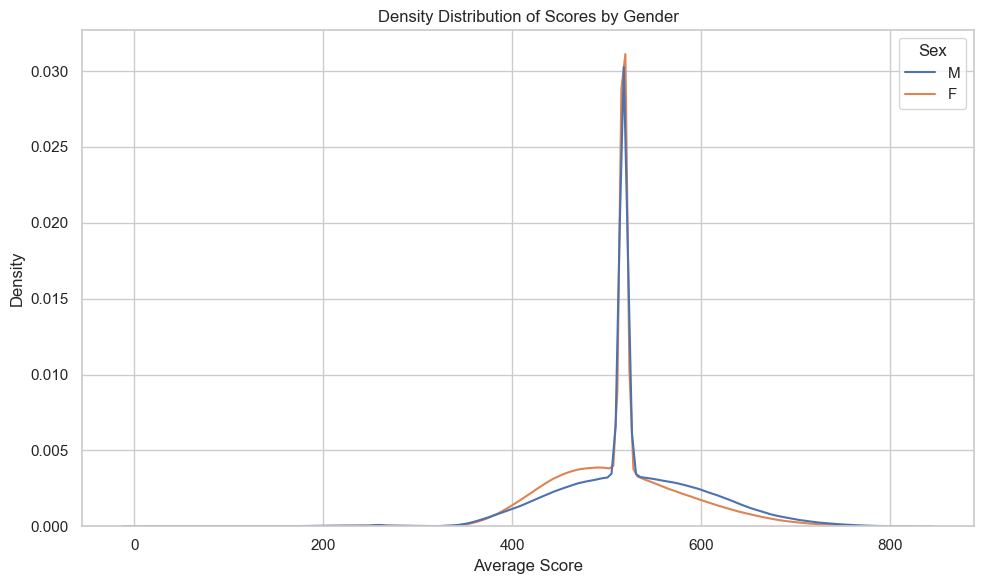

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Average', hue='Sex', common_norm=False)
plt.title('Density Distribution of Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## How does age group influence performance?

In [9]:
if 'Age Group' in df.columns:
    age_stats = df.groupby(['Age Group'])['Average'].describe()

    age_stats['cv'] = age_stats['std'] / age_stats['mean']

    print('Age Group Stats:')
    print(age_stats)

Age Group Stats:
              count   mean   std    min    25%    50%    75%    max   cv
Age Group                                                               
1         347434.00 521.80 70.31   0.00 478.75 517.77 567.30 792.05 0.13
2         753800.00 521.29 72.02   0.00 475.93 517.77 565.00 820.17 0.14
3         905047.00 515.51 70.37   0.00 472.88 517.77 549.98 833.23 0.14
4         431592.00 516.82 70.83   0.00 478.45 517.77 543.25 815.88 0.14
5         267383.00 518.90 70.71   0.00 484.62 517.77 540.49 823.23 0.14
6         183401.00 520.16 69.29   0.00 491.40 517.77 536.48 815.57 0.13
7         137884.00 520.33 67.16   0.00 496.25 517.77 532.30 806.67 0.13
8         111813.00 519.94 64.51   0.00 501.03 517.77 527.07 810.17 0.12
9          91359.00 518.93 61.98  71.80 503.70 517.77 521.55 807.05 0.12
10         73127.00 518.32 61.26   0.00 505.96 517.77 517.77 806.15 0.12
11        246292.00 517.52 59.23   0.00 509.67 517.77 517.77 813.73 0.11
12        133381.00 515.94 57.48  

Average Score by Age Group:
    Age Group  Average
0           1   521.80
1           2   521.29
2           3   515.51
3           4   516.82
4           5   518.90
5           6   520.16
6           7   520.33
7           8   519.94
8           9   518.93
9          10   518.32
10         11   517.52
11         12   515.94
12         13   511.50
13         14   506.48
14         15   503.31
15         16   501.76
16         17   501.64
17         18   497.03
18         19   490.46
19         20   484.93


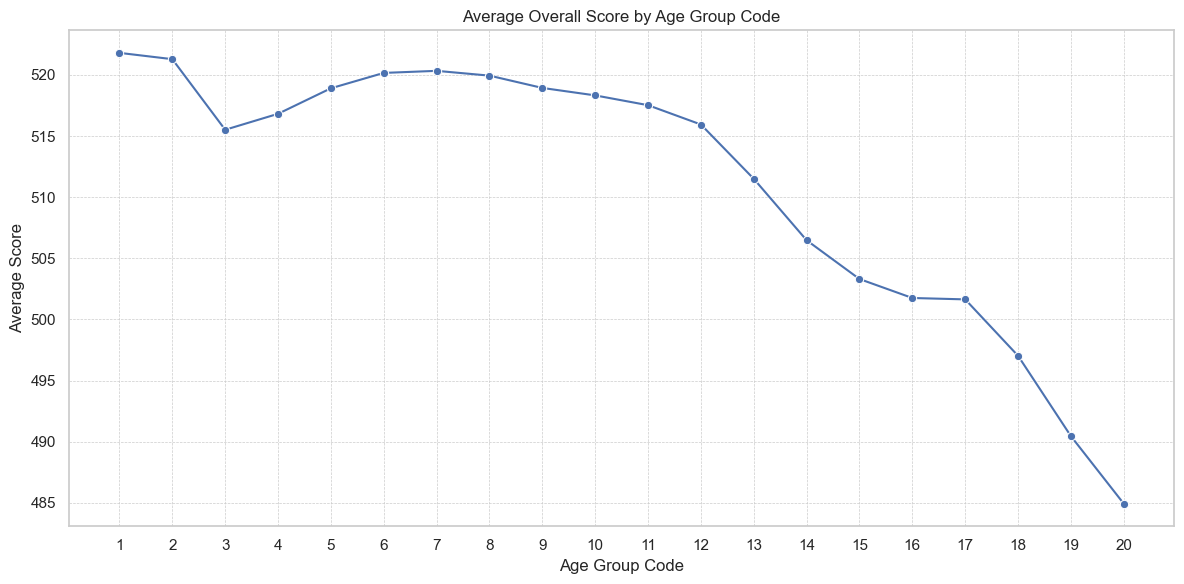

In [10]:
age_performance = df.groupby(['Age Group'])['Average'].mean().reset_index()
print('Average Score by Age Group:')
print(age_performance)

plt.figure()
sns.lineplot(x='Age Group', y='Average', data=age_performance, marker='o')
plt.title('Average Overall Score by Age Group Code')
plt.xlabel('Age Group Code')
plt.ylabel('Average Score')
plt.xticks(age_performance['Age Group'].unique()) # to show all age groups
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

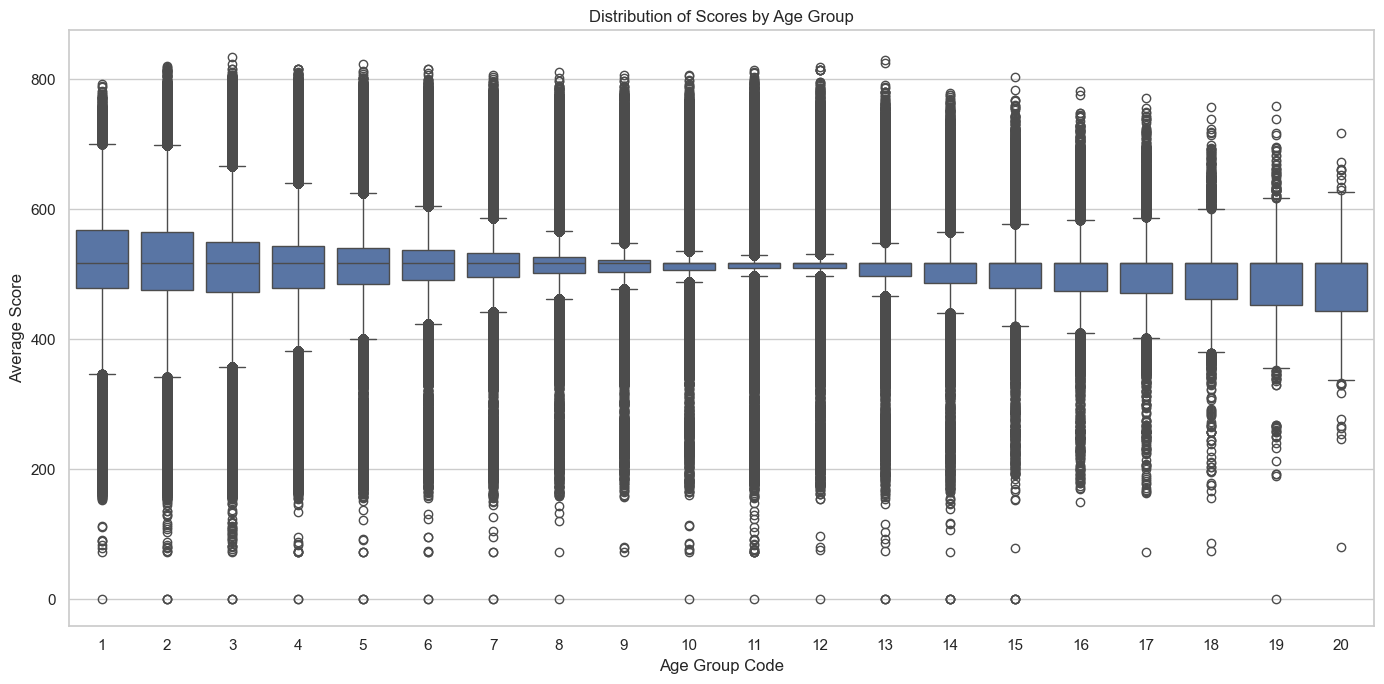

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Age Group', y='Average', data=df)
plt.title('Distribution of Scores by Age Group')
plt.xlabel('Age Group Code')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

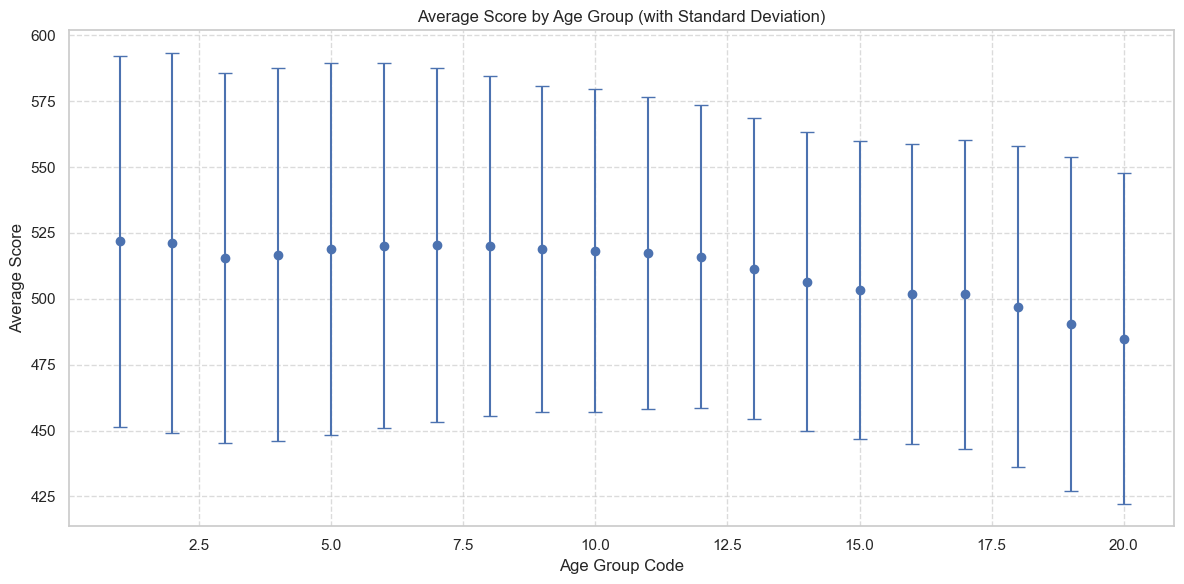

In [12]:
age_means = df.groupby('Age Group')['Average'].mean()
age_stds = df.groupby('Age Group')['Average'].std()

plt.figure()
plt.errorbar(age_means.index, age_means.values, yerr=age_stds.values, fmt='o', capsize=5)
plt.title('Average Score by Age Group (with Standard Deviation)')
plt.xlabel('Age Group Code')
plt.ylabel('Average Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## How does family income influence performance?

In [13]:
income_stats = df.groupby(['Family Income'])['Average'].describe()

income_stats['cv'] = income_stats['std'] / income_stats['mean']

print('Family Income Stats:')
print(income_stats)

Family Income Stats:
                   count   mean   std    min    25%    50%    75%    max   cv
Family Income                                                                
0              268053.00 485.75 57.04   0.00 446.02 516.05 517.77 775.62 0.12
1320          1245271.00 493.61 57.17   0.00 457.73 517.77 517.77 805.32 0.12
1980           650942.00 508.97 57.55   0.00 480.30 517.77 525.30 799.48 0.11
2640           437366.00 517.92 60.30   0.00 489.80 517.77 543.97 829.42 0.12
3300           293994.00 526.57 63.30   0.00 497.38 517.77 560.35 823.23 0.12
3960           171344.00 535.08 66.28   0.00 505.55 517.77 574.80 814.02 0.12
5280           261327.00 543.99 68.59  78.65 513.60 527.92 588.42 809.62 0.13
6600           139279.00 553.29 71.74  72.20 517.77 541.80 602.10 833.23 0.13
7920            85970.00 559.82 73.09  73.70 517.77 551.15 610.48 815.02 0.13
9240            75179.00 566.35 74.31  75.25 517.77 561.17 618.71 815.82 0.13
10560           59631.00 570.37 75.46   0.0

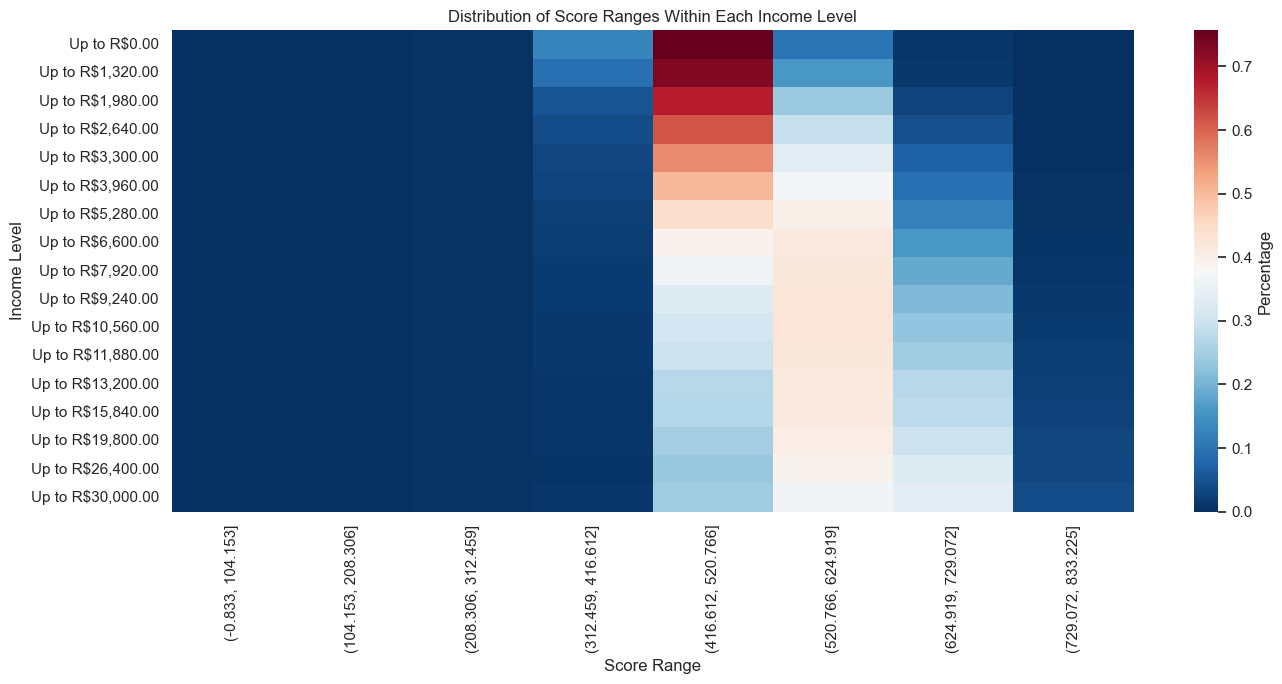

In [23]:
plt.figure(figsize=(14, 7))

# Divide the scores into bins
if not 'Score Bin' in df.columns:
    df['Score Bin'] = pd.cut(df['Average'], bins=8)

heatmap_data = pd.crosstab(df['Family Income'], df['Score Bin'], normalize='index')
formatted_income = [f'Up to R${x:,.2f}' for x in heatmap_data.index]
heatmap_data.index = formatted_income

sns.heatmap(heatmap_data, cmap='RdBu_r', annot=False, fmt='.2%', cbar_kws={'label': 'Percentage'})
plt.title('Distribution of Score Ranges Within Each Income Level')
plt.xlabel('Score Range')
plt.ylabel('Income Level')
plt.tight_layout()
plt.show()

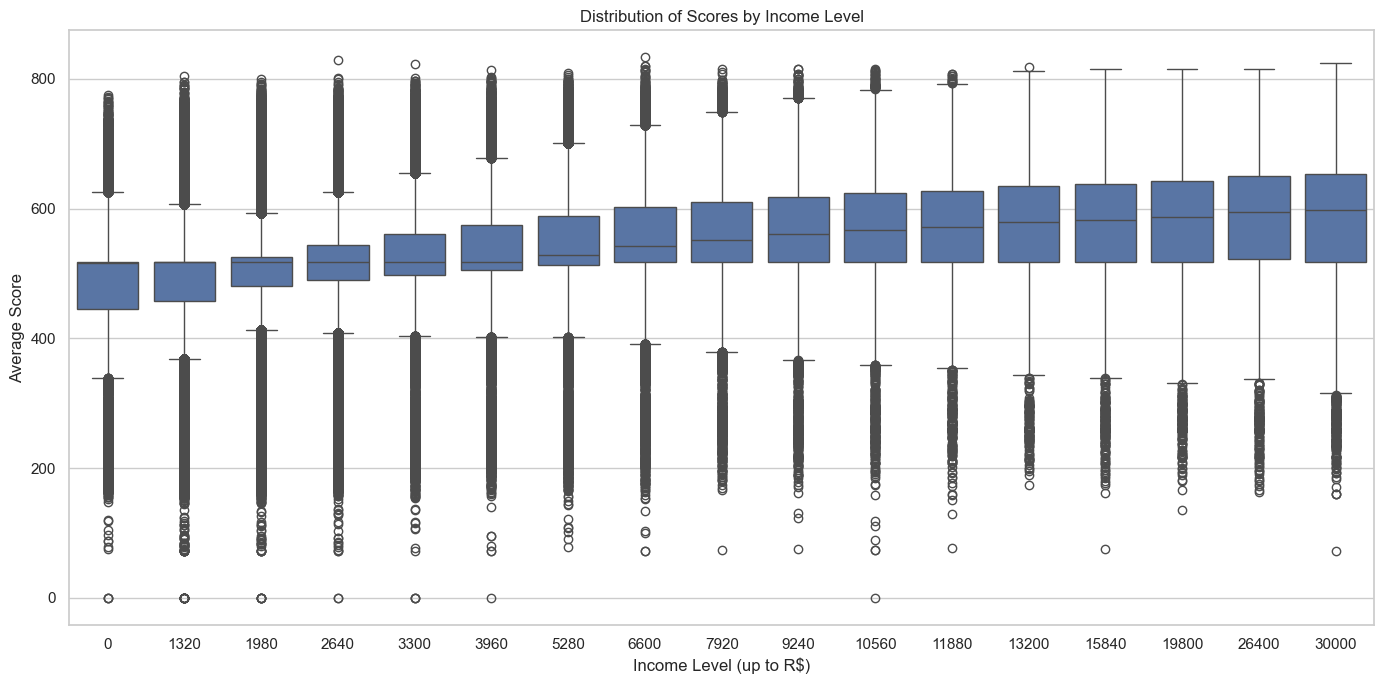

In [24]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Family Income', y='Average', data=df)
plt.title('Distribution of Scores by Income Level')
plt.xlabel('Income Level (up to R$)')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

## What is the impact of parents' education on performance?

Average Score by Father's Education:
   Father's Education  Average
0                   0   487.87
1                   1   496.33
2                   2   501.06
3                   3   504.27
4                   4   517.25
5                   5   548.67
6                   6   557.45
7                   7   494.82
Average Score by Mother's Education:
   Mother's Education  Average
0                   0   489.17
1                   1   498.66
2                   2   505.93
3                   3   510.20
4                   4   523.51
5                   5   559.78
6                   6   570.81
7                   7   502.33


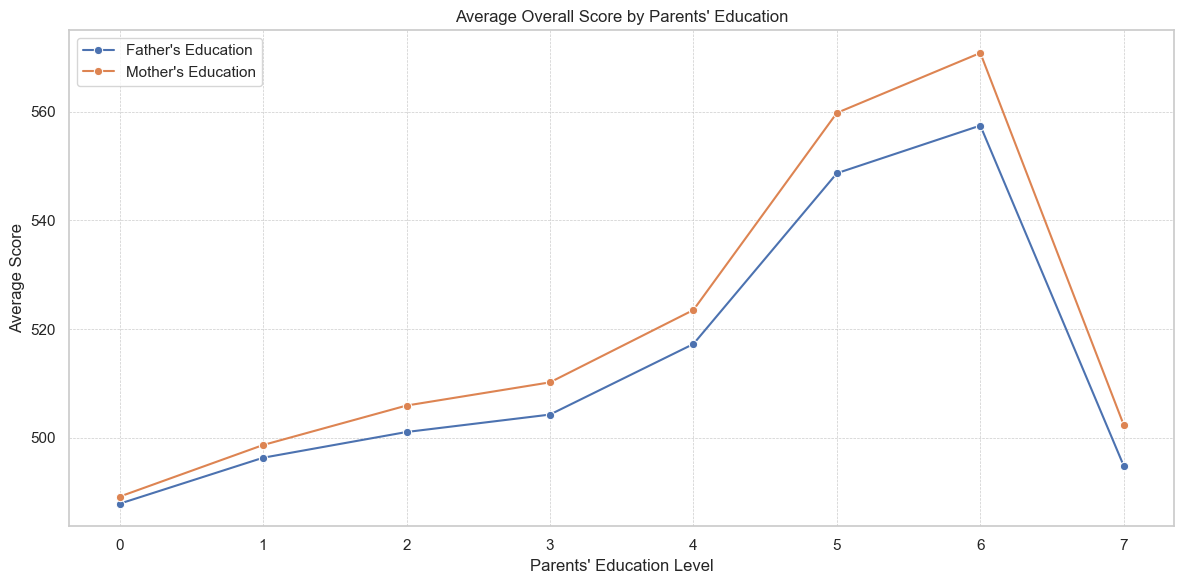

In [25]:
if 'Father\'s Education' and 'Mother\'s Education' in df.columns:
    father_performance = df.groupby('Father\'s Education')['Average'].mean().reset_index()
    mother_performance = df.groupby('Mother\'s Education')['Average'].mean().reset_index()

    print('Average Score by Father\'s Education:')
    print(father_performance)
    print('Average Score by Mother\'s Education:')
    print(mother_performance)

    plt.figure()
    sns.lineplot(x='Father\'s Education', y='Average', data=father_performance, marker='o', label='Father\'s Education')
    sns.lineplot(x='Mother\'s Education', y='Average', data=mother_performance, marker='o', label='Mother\'s Education')
    plt.title('Average Overall Score by Parents\' Education')
    plt.xlabel('Parents\' Education Level')
    plt.ylabel('Average Score')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

## How does access to technological resources (internet/computer) affect grades?

Average Score by Internet Access:
   Internet Access  Average
0                0   487.28
1                1   520.99


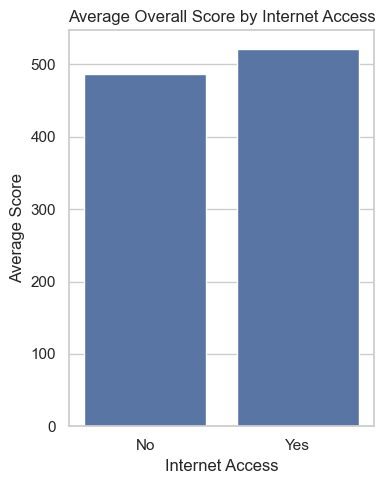

In [26]:
if 'Internet Access' in df.columns:
    internet_performance = df.groupby('Internet Access')['Average'].mean().reset_index()
    print('Average Score by Internet Access:')
    print(internet_performance)

    plt.figure(figsize=(4, 5))
    sns.barplot(x='Internet Access', y='Average', data=internet_performance)
    plt.title('Average Overall Score by Internet Access')
    plt.xlabel('Internet Access')
    plt.ylabel('Average Score')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

Average Score by Number of Computers:
   Number of Computers  Average
0                    0   496.33
1                    1   529.78
2                    2   561.71
3                    3   579.60
4                    4   591.73


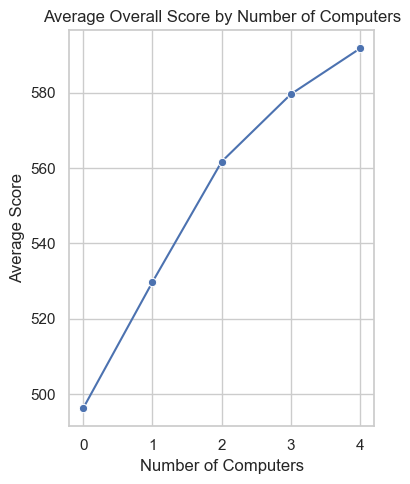

In [27]:
if 'Number of Computers' in df.columns:
    computer_performance = df.groupby('Number of Computers')['Average'].mean().reset_index()
    print('Average Score by Number of Computers:')
    print(computer_performance)

    plt.figure(figsize=(4, 5))
    sns.lineplot(x='Number of Computers', y='Average', data=computer_performance, marker='o')
    plt.title('Average Overall Score by Number of Computers')
    plt.xlabel('Number of Computers')
    plt.ylabel('Average Score')
    plt.xticks(computer_performance['Number of Computers'].unique())
    plt.tight_layout()
    plt.show()